In [16]:
import sys
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import pathlib

# modify the sys.path to include the source directory
src_dir = pathlib.Path().absolute().parent
sys.path.append(str(src_dir))

from src.enums import DataSplit
from src.data.bbox import BoundingBoxDetectionDataset
from src.enums import DataSplit
from src.utils.transforms import BBoxResize, BBoxBaseTransform, BBoxCompose, BBoxCocoToCenterFormat, BBoxRotate
from src.utils.bbox import generate_anchors
from matplotlib.patches import Rectangle

In [17]:
DATASETS_ROOT = src_dir / 'datasets'
BATCH_SIZE = 1
transform = BBoxCompose([BBoxBaseTransform(), BBoxResize((256, 256)),BBoxCocoToCenterFormat(), BBoxRotate()])
dataset = BoundingBoxDetectionDataset(root_dir=DATASETS_ROOT, split=DataSplit.TRAIN, transform=transform)
data_loader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)

In [18]:
img, b = next(iter(data_loader))
img = img[0]
b = b[0]

270
113.60000000000001 96.75 128.0 128.0 -270


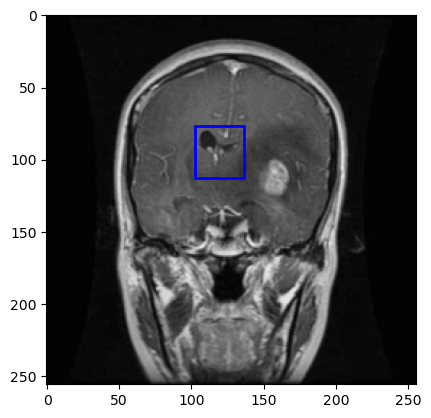

In [19]:
plt.imshow(img.permute(1, 2, 0).numpy(), cmap="gray")
rect = Rectangle(
        (b[0] - b[2]/2, b[1] - b[3]/2), b[2], b[3], linewidth=2, edgecolor="b", facecolor="none"
    )
plt.gca().add_patch(rect)

In [20]:
b

tensor([119.3263,  94.7030,  33.5000,  36.0000], dtype=torch.float64)